In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

titanic = pd.read_csv('C:/Users/Tharuka/Documents/Applied-Machine-Learning-Foundations/Ex_Files_Applied_Machine_Learning/Exercise Files/titanic.csv')
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# drop all categories features

cat_feat = ['PassengerId', 'Name', 'Ticket', 'Sex', 'Embarked']
titanic.drop(cat_feat,axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
0,0,3,22.0,1,0,7.2500,NaN
1,1,1,38.0,1,0,71.2833,C85
2,1,3,26.0,0,0,7.9250,NaN
3,1,1,35.0,1,0,53.1000,C123
4,0,3,35.0,0,0,8.0500,NaN


In [3]:
titanic.describe()


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
titanic.groupby('Survived').mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


In [5]:
titanic.groupby(titanic['Age'].isnull()).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


In [ ]:
#plot continuous features

c:\users\tharuka\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


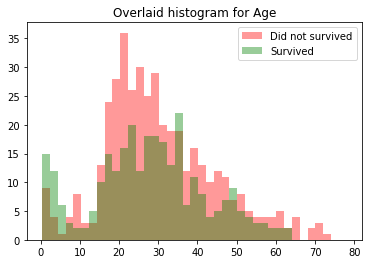

c:\users\tharuka\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


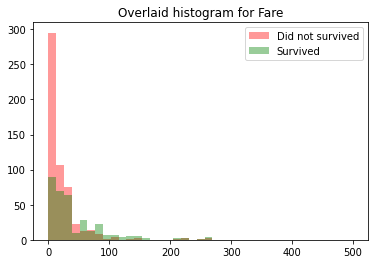

In [6]:
for i in ['Age', 'Fare']:
    died = list(titanic[titanic["Survived"] == 0][i].dropna())
    survived = list(titanic[titanic["Survived"] == 1][i].dropna())
    xmin = min(min(died), min(survived))
    xmax = max(max(died), max(survived))
    width = (xmax - xmin) /40
    sns.distplot(died,color ='r', kde=False, bins=np.arange(xmin,xmax,width))
    sns.distplot(survived,color ='g', kde=False, bins=np.arange(xmin,xmax,width))
    plt.legend(['Did not survived', 'Survived'])
    plt.title("Overlaid histogram for {}".format(i))
    plt.show()

<Figure size 432x288 with 0 Axes>

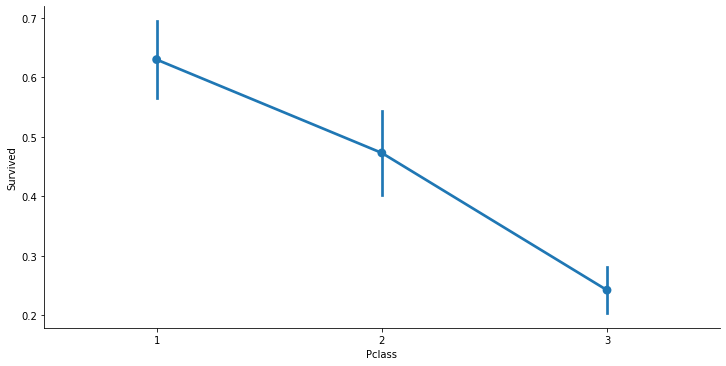

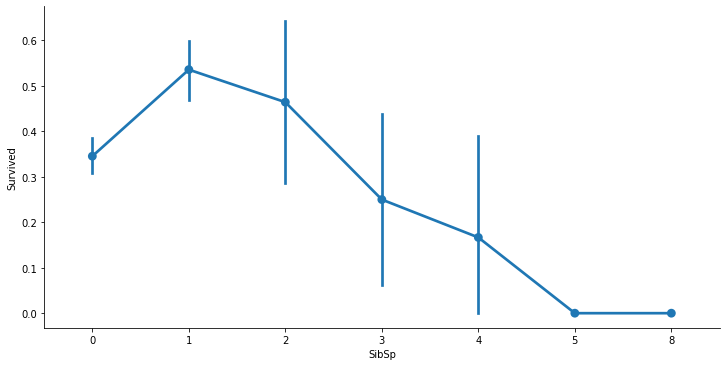

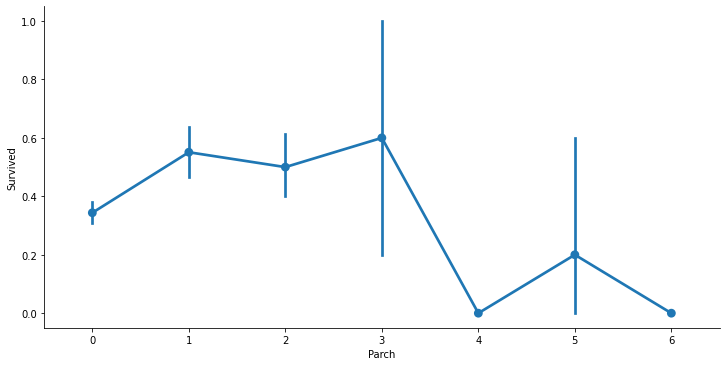

In [7]:
for i,col in enumerate(['Pclass','SibSp','Parch']):
    #to creat new plot;
    #1st way is to add enumerate in for loop ..return the index of the list 
    #and actual item in the list
    plt.figure(i)
    sns.catplot(x= col,y='Survived',data=titanic,kind='point',aspect=2,)

#x and y axis, data set ,kind =point, aspect controls the size


#the point of each part represent the precentage of each levelwho servived


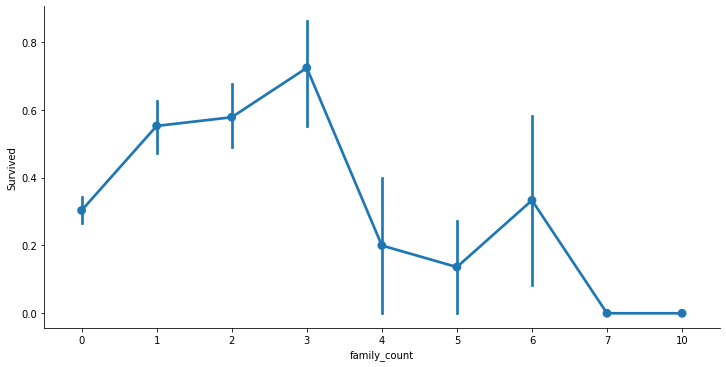

In [8]:
titanic['family_count'] = titanic['SibSp'] + titanic['Parch']
sns.catplot(x= 'family_count',y='Survived',data=titanic,kind='point',aspect=2,)

In [9]:
#fill a missing data value in Age 
#replace a avarage value to that so its not biased 
titanic['Age'].fillna(titanic['Age'].mean(),inplace =True)
#fillna is.... goes through the data set finds null ages and replace it with the mean value
titanic.isnull().sum() #this shows where we have missing values in our data set



Survived          0
Pclass            0
Age               0
SibSp             0
Parch             0
Fare              0
Cabin           687
family_count      0
dtype: int64

In [10]:
titanic.head(20) # shows first 10 rows

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,family_count
0,0,3,22.000000,1,0,7.2500,NaN,1
1,1,1,38.000000,1,0,71.2833,C85,1
2,1,3,26.000000,0,0,7.9250,NaN,0
3,1,1,35.000000,1,0,53.1000,C123,1
4,0,3,35.000000,0,0,8.0500,NaN,0
5,0,3,29.699118,0,0,8.4583,NaN,0
6,0,1,54.000000,0,0,51.8625,E46,0
7,0,3,2.000000,3,1,21.0750,NaN,4
8,1,3,27.000000,0,2,11.1333,NaN,2
9,1,2,14.000000,1,0,30.0708,NaN,1


In [11]:
#combine SibSp & Parch

#when combine multiple features in to one u must almost remove the original data from the data set

titanic['family_count'] = titanic['SibSp'] + titanic['Parch']
titanic.drop(['SibSp','Parch'],axis =1, inplace=True)
titanic.head()

,Survived,Pclass,Age,Fare,Cabin,family_count
0,0,3,22.0,7.2500,NaN,1
1,1,1,38.0,71.2833,C85,1
2,1,3,26.0,7.9250,NaN,0
3,1,1,35.0,53.1000,C123,1
4,0,3,35.0,8.0500,NaN,0


In [12]:
titanic['Cabin_indicator'] = np.where(titanic['Cabin'].isnull(),0,1)
titanic.head(10)



,Survived,Pclass,Age,Fare,Cabin,family_count,Cabin_indicator
0,0,3,22.000000,7.2500,NaN,1,0
1,1,1,38.000000,71.2833,C85,1,1
2,1,3,26.000000,7.9250,NaN,0,0
3,1,1,35.000000,53.1000,C123,1,1
4,0,3,35.000000,8.0500,NaN,0,0
5,0,3,29.699118,8.4583,NaN,0,0
6,0,1,54.000000,51.8625,E46,0,1
7,0,3,2.000000,21.0750,NaN,4,0
8,1,3,27.000000,11.1333,NaN,2,0
9,1,2,14.000000,30.0708,NaN,1,0
